In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.020663022994995117


In [8]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.20)

Train on 2967 samples, validate on 742 samples
Epoch 1/1
2967/2967 [==============================] - 4s - loss: 6.4469e-04 - val_loss: 6.1474e-04


yo


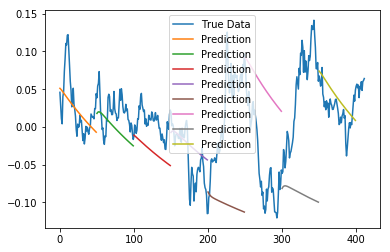

In [9]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [38]:
f = open('sp500.csv', 'r').read()
data = f.split('\n')
result = []

In [39]:
for index in range(len(data) - 51):
    result.append(data[index: index + 51])

In [32]:
window = result[0]
normalised_window = [((float(p) / float(window[0])) - 1) for p in window]

In [35]:
import numpy as np

In [43]:
result = np.array(normalise_windows(result))

In [40]:
def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [44]:
row = round(0.9 * result.shape[0])

In [45]:
row

3709